In [1]:
import cv2
import os
import sys
import time
import numpy as np
import matplotlib.pyplot as plt


uint16
<class 'numpy.ndarray'>
(600, 480, 640)


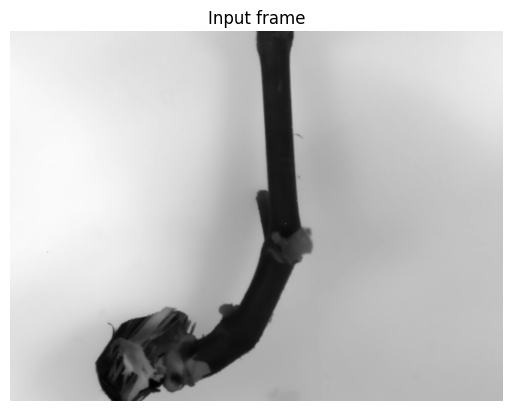

In [14]:
data = np.load('../../../../../test_data/Ries_B28_N01.npy', allow_pickle=True).astype(np.uint16)
print(data.dtype)
print(type(data))
print(data.shape)
frame = data[300]
plt.imshow(frame, cmap='gray')
plt.title('Input frame')
plt.axis('off')
plt.show()

Using frames from 30 to 300
originally, it has 184320000 pixels
after applying mask, only 35849 pixels are left
after applying mask, std_dev has 35849 pixels


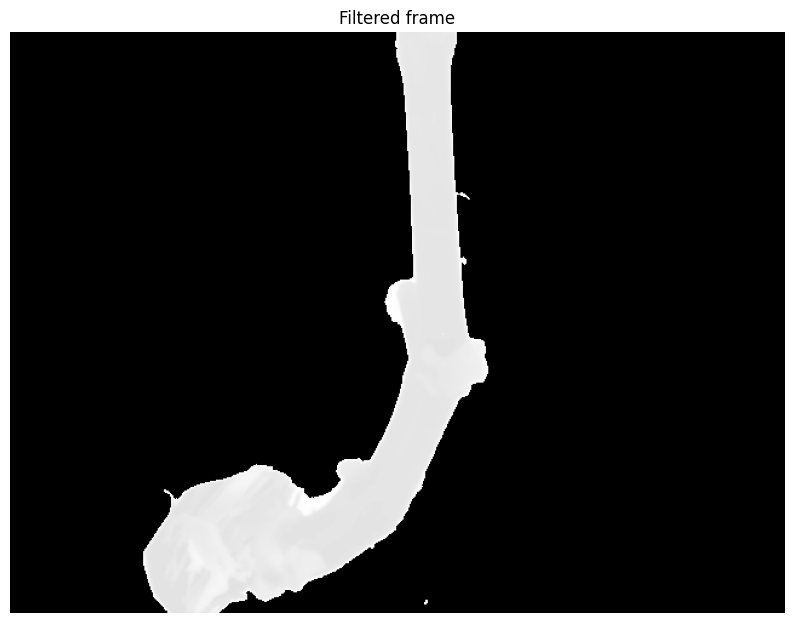

top_n pixels coordinates: [436 452 435 ... 388 390 434], [156 174 156 ... 193 189 205]


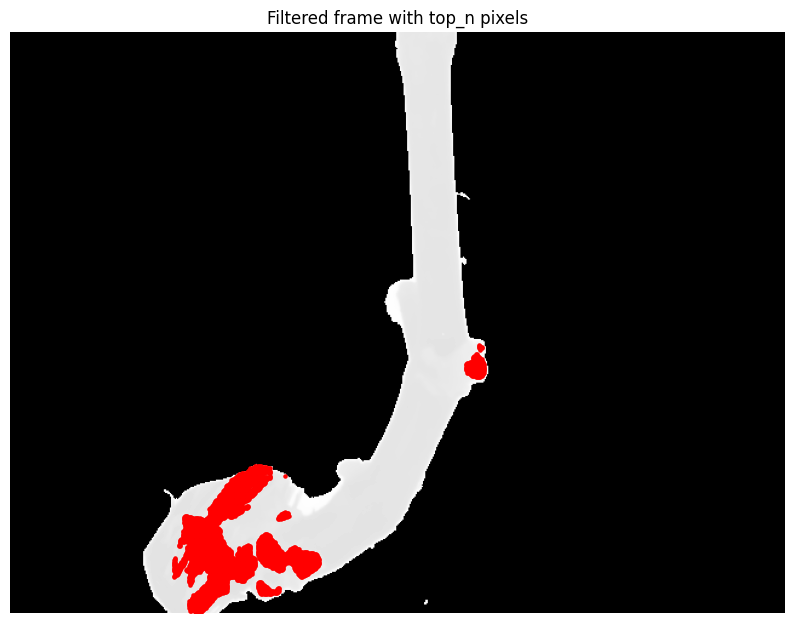

In [38]:
top_n=5000
start_frame=30
end_frame=300
threshold=9400


start_frame = max(0, start_frame)
end_frame = min(data.shape[0], end_frame)
print(f'Using frames from {start_frame} to {end_frame}')

mean_values = np.mean(data[start_frame:end_frame, :, :], axis=0)
mask = mean_values < threshold

# Apply the mask and calculate the standard deviation for the masked pixels
masked_data = data[start_frame:end_frame, :, :] * mask
std_dev = np.std(masked_data, axis=0)
print(f'originally, it has {np.sum(data > 0)} pixels')
print(f'after applying mask, only {np.sum(mask)} pixels are left')
print(f'after applying mask, std_dev has {np.sum(std_dev > 0)} pixels')
# print(f'some std_dev values that are not zero: {std_dev[std_dev > 0]}')

# filter the original data with the mask
filtered_data = data * mask

# plot the filtered data
plt.figure(figsize=(10, 10))
plt.imshow(filtered_data[200], cmap='gray')
plt.title('Filtered frame')
plt.axis('off')
plt.show()


# find the top_n pixels with the highest std_dev
flat_std_dev = std_dev.flatten()
indices = np.argpartition(flat_std_dev, -top_n)[-top_n:]
sorted_indices = indices[np.argsort(flat_std_dev[indices])][::-1]
x_coords, y_coords = np.unravel_index(sorted_indices, std_dev.shape)
print(f'top_n pixels coordinates: {x_coords}, {y_coords}')


# plot the top_n pixels on the filtered data with red dots
plt.figure(figsize=(10, 10))
plt.imshow(filtered_data[200], cmap='gray')
plt.title('Filtered frame with top_n pixels')
plt.axis('off')
plt.scatter(y_coords, x_coords, c='r', s=5)
plt.show()

In [6]:
print('The shape of each frame of data is:',frame.shape)
print(frame)

The shape of each frame of data is: (480, 640)
[[9967 9964 9962 ... 9935 9935 9937]
 [9968 9968 9967 ... 9935 9936 9937]
 [9967 9967 9966 ... 9935 9936 9937]
 ...
 [9860 9858 9856 ... 9612 9613 9616]
 [9860 9857 9856 ... 9613 9614 9616]
 [9861 9858 9856 ... 9614 9616 9616]]


(480, 640)
uint16


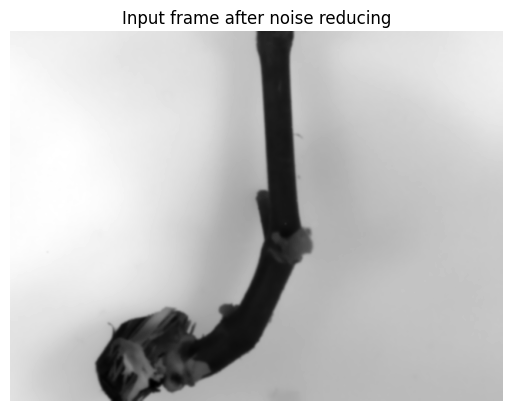

In [7]:
blurred = cv2.GaussianBlur(frame, (5, 5), 0)
print(blurred.shape)
print(blurred.dtype)
plt.imshow(blurred, cmap='gray')
plt.title('Input frame after noise reducing')
plt.axis('off')
plt.show()

uint16


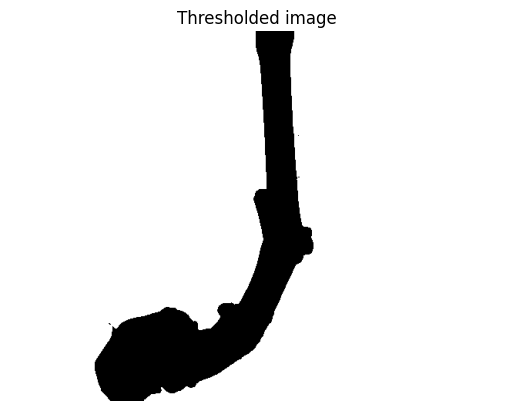

In [13]:
# Choose a threshold value that works well for your image, 8820 is by maual testing
threshold_value = 9400

# Threshold the image
ret, thresh = cv2.threshold(blurred, threshold_value, 255, cv2.THRESH_BINARY)
print(thresh.dtype)

# Display the thresholded image
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded image')
plt.axis('off')
plt.show()

In [5]:
import numpy as np

def top_n_values_with_coords(arr, N):
    # Flatten the array to 1D
    flat_arr = arr.flatten()

    # Find the indices of the top N values in the flattened array
    top_n_indices = np.argpartition(flat_arr, -N)[-N:]

    # Convert these indices to 2D coordinates
    coords = np.unravel_index(top_n_indices, arr.shape)

    # Extract the values using these coordinates
    values = arr[coords]

    # Combine the coordinates and values, and sort them by values in descending order
    combined = sorted(zip(zip(*coords), values), key=lambda x: x[1], reverse=True)

    return combined

# Example usage
arr = np.array([[1, 3, 5], [2, 4, 6]])
N = 2
print(top_n_values_with_coords(arr, N))


[((1, 2), 6), ((0, 2), 5)]
